<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Plastic_Sales_Forcasting</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import plotly_express as ps 

import statsmodels.formula.api as smf

#models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt


pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})

In [2]:
df = pd.read_csv('PlasticSales.csv')

In [15]:
df

,Month,Sales,t,t_squared,month
0,Jan-49,742,1,1,Jan
1,Feb-49,697,2,4,Feb
2,Mar-49,776,3,9,Mar
3,Apr-49,898,4,16,Apr
4,May-49,1030,5,25,May
5,Jun-49,1107,6,36,Jun
6,Jul-49,1165,7,49,Jul
7,Aug-49,1216,8,64,Aug
8,Sep-49,1208,9,81,Sep
9,Oct-49,1131,10,100,Oct


In [3]:
df.shape

(60, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<AxesSubplot:>

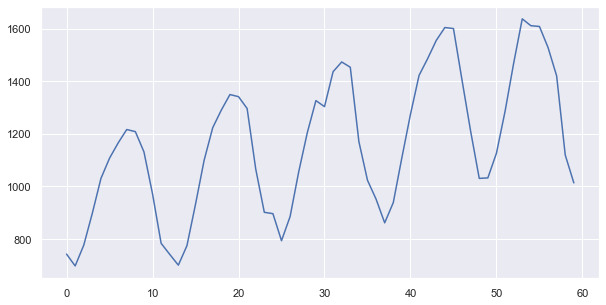

In [9]:
df.Sales.plot()

<AxesSubplot:>

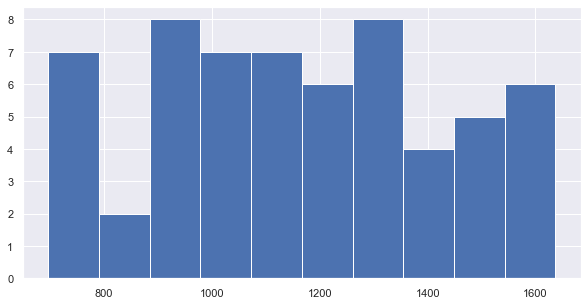

In [10]:
df.Sales.hist()

### Adding t and t_squared columns

In [11]:
df['t'] = [x for x in range(1, df.shape[0]+1)]
df['t_squared'] = [x*x for x in df.t]
df.head()

,Month,Sales,t,t_squared
0,Jan-49,742,1,1
1,Feb-49,697,2,4
2,Mar-49,776,3,9
3,Apr-49,898,4,16
4,May-49,1030,5,25


In [13]:
df['month'] = df.Month.str[:3]
df.head()

,Month,Sales,t,t_squared,month
0,Jan-49,742,1,1,Jan
1,Feb-49,697,2,4,Feb
2,Mar-49,776,3,9,Mar
3,Apr-49,898,4,16,Apr
4,May-49,1030,5,25,May


In [16]:
month = [x[0] for x in df.iloc[0:12, 4:5].values]
month

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [17]:
dummies = pd.get_dummies(df.month, columns=month)
dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
dummies = dummies.reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

dummies

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
for m in df.month:
    df[m] = dummies[m]
df.head()

,Month,Sales,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-49,742,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-49,697,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-49,776,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-49,898,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0
4,May-49,1030,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0


In [20]:
df['year'] = df.Month.str[4:]
df.head()

,Month,Sales,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,year
0,Jan-49,742,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0,49
1,Feb-49,697,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0,49
2,Mar-49,776,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0,49
3,Apr-49,898,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0,49
4,May-49,1030,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0,49


In [21]:
df['log_sales'] = np.log(df.Sales)
df.head()

,Month,Sales,t,t_squared,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,year,log_sales
0,Jan-49,742,1,1,Jan,1,0,0,0,0,0,0,0,0,0,0,0,49,6.609349
1,Feb-49,697,2,4,Feb,0,1,0,0,0,0,0,0,0,0,0,0,49,6.546785
2,Mar-49,776,3,9,Mar,0,0,1,0,0,0,0,0,0,0,0,0,49,6.654153
3,Apr-49,898,4,16,Apr,0,0,0,1,0,0,0,0,0,0,0,0,49,6.800170
4,May-49,1030,5,25,May,0,0,0,0,1,0,0,0,0,0,0,0,49,6.937314


### EDA

In [29]:
x = pd.pivot_table(data=df, values='Sales', index='year', aggfunc='mean',
                  columns = 'month', fill_value = 0)

In [30]:
x

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
49,898,1216,783,697,742,1165,1107,776,1030,971,1131,1208
50,932,1349,901,700,741,1290,1223,774,1099,1066,1296,1341
51,1055,1436,1023,793,896,1303,1326,885,1204,1170,1453,1473
52,1109,1555,1209,861,951,1486,1422,938,1274,1403,1600,1604
53,1285,1608,1013,1032,1030,1611,1637,1126,1468,1119,1420,1528


<AxesSubplot:xlabel='month', ylabel='year'>

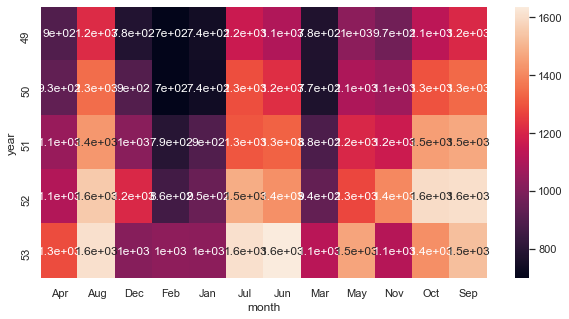

In [31]:
sns.heatmap(x, annot=True)

<AxesSubplot:xlabel='year', ylabel='Sales'>

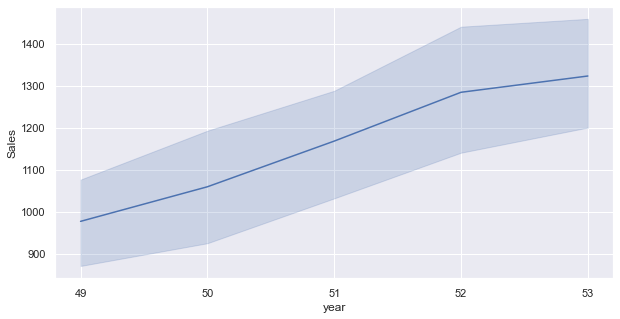

In [33]:
sns.lineplot(x='year', y='Sales', data=df)

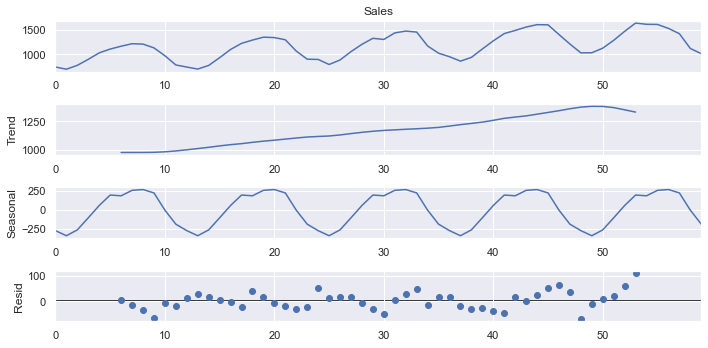

In [34]:
decompose_ts_add = seasonal_decompose(df.Sales, period=12)
decompose_ts_add.plot()
plt.show()

In [35]:
Train = df.head(40)
Test = df.tail(20)

In [41]:
#Linear Model
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2)) 

#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))

#Quadratic 
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

#Additive seasonality 
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))

#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))

#Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))

#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))

rmse_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(rmse_data)
table_rmse.sort_values(['RMSE_Values'], ascending = True) 

,MODEL,RMSE_Values
5,rmse_Mult_sea,117.114969
6,rmse_Mult_add_sea,117.114969
4,rmse_add_sea_quad,118.236857
0,rmse_linear,248.924003
1,rmse_Exp,250.107057
3,rmse_add_sea,263.236202
2,rmse_Quad,495.466882


### Final model

In [43]:
Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',
                      data = df).fit()

Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     73.65
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.84e-26
Time:                        20:17:38   Log-Likelihood:                 91.033
No. Observations:                  60   AIC:                            -156.1
Df Residuals:                      47   BIC:                            -128.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3009      0.015    428.744      0.000       6.271       6.330
t              0.0067      0.000     14.749      0.000       0.006       0.008
Jan            0.2930      0.026     11.391      0.000       0.241       0.345
Feb            0.2184      0.026      8.499      0.000       0.167       0.270
Mar            0.3098      0.026     12.061      0.000       0.258       0.361
Apr            0.4645      0.026     18.087      0.000       0.413       0.516
May            0.5989      0.026     23.320      0.000       0.547       0.651
Jun            0.6911      0.026     26.896      0.000       0.639       0.743
Jul            0.7073      0.026     27.509      0.000       0.656       0.759
Aug            0.7463      0.026     28.992      0.000       0.694       0.798
Sep            0.7381      0.026     28.636      0.000       0.686       0.790
Oct            0.6935      0.026     26.860      0.000       0.642       0.745
Nov            0.4999      0.026     19.325      0.000       0.448       0.552
Dec            0.3400      0.026     13.114      0.000       0.288       0.392
==============================================================================
Omnibus:                        9.438   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.796
Skew:                          -0.547   Prob(JB):                      0.00166
Kurtosis:                       4.980   Cond. No.                     3.93e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.79e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
df['forcast'] = pd.DataFrame(np.exp(Mul_Add_sea.predict(df)))
df.forcast.head()

0     735.511604
1     687.285730
2     758.119020
3     890.914100
4    1026.009386
Name: forcast, dtype: float64

In [ ]:
sns.lineplot(x='Year', y ='Sales', data = df, label = 'Actual')
sns.lineplot(x='Year', y='forcast', data = df,label = 'Forcasting')